# Homework 4 - CS348 Spring 2019

**Description** - In this assignment, you will run and analyze binary classification using K-nearest neighbors and multiclass classification using a fully connected neural network.

**Getting Started** - You should complete the assignment using your own installation of Python 3 and the packages numpy, pandas, keras, matplotlib, and seaborn. Download the assignment from Moodle and unzip the file. This will create a directory with this file, 'HW04.ipynb'.

**Deliverables** - The assignment has a single deliverable: this jupyter notebook file saved as a pdf. Please answer all coding and writing questions in the body of this file. Once all of the answers are complete, download the file by navigating the following menus: File -> Download as -> PDF via LaTeX. Submit the downloaded pdf file on gradescope. Alternatively, you can save the file as a pdf via the following: File -> Print Preview -> Print as pdf.

**Data Sets** - In this assignment, you will two datasets from the sci-kit learn repository, one on breast cancer and one on handwritten digits.

**Academic Honesty Statement** - Copying solutions from external sources (books, web pages, etc.) or other students is considered cheating. Sharing your solutions with other students is considered cheating. Posting your code to public repositories such as GitHub is also considered cheating. Any detected cheating will result in a grade of 0 on the assignment for all students involved, and potentially a grade of F in the course. 

This academic honesty statement does not restrict you from reading official documentation or using other web resources for understanding the syntax of python, related data science libraries, or properties of distributions.

In [1]:
# Do not import any other libraries other than those listed here. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer, load_digits

Using TensorFlow backend.


# Problem 1 - KNN

In this problem you'll use a K-nearest neighbors model to classify whether a tumor is benign or malignant in a breast cancer dataset.

In [2]:
# Loading data.
data = load_breast_cancer()

In [3]:
n = data['data'].shape[0]

index = [346, 446, 385,  90, 353, 333, 408, 398, 151,  11, 326, 164, 244,
       252, 471, 208,  30, 135,  12, 472, 109, 263,  62, 504, 313, 266,
       301, 558, 460, 213, 498, 526, 444,  10, 264, 239,  44, 561, 543,
        83,  87,  32, 551, 516, 358, 218, 552, 507, 272, 141, 533,  98,
       190, 337, 243, 149,  13, 319, 285, 513, 383, 167, 295, 506, 563,
       303, 162, 507, 451, 264, 270, 332, 566, 385, 334, 562, 191, 241,
       133, 268, 453, 126, 175,  19, 114, 406, 281, 310, 323,  48, 218,
       401, 541, 510, 114, 533,  54, 374, 127, 321, 487,  89, 300, 178,
       356,  89, 430, 333,  37, 471, 486, 301, 183, 107, 164,  31,  77,
       163, 568, 359, 443, 508, 274, 324,  67, 147,  83, 332, 470,  98,
        90, 468,  95, 477, 403, 164, 189, 489, 199, 432, 212,  90,  94,
        86, 184, 319, 448, 382, 296, 323, 551, 363, 386, 273, 407, 254,
        97, 274, 459, 560, 154, 515, 559, 281,  79, 134, 451,   9, 252,
       485, 305, 245, 221, 219, 467,  37, 497, 186, 327, 311, 236, 397,
       189, 468, 334, 158, 231, 100, 542,  40, 410, 481, 359, 304, 269,
       267, 194, 144,  48,  22, 381, 288, 507, 530, 393, 207,  47, 551,
       202, 387, 239,  16, 286, 280, 553,  80, 327,  66, 452, 508, 446,
       418, 280, 426, 468, 233, 284,  51, 117,  40, 502, 410, 109,  81,
       449, 420,  10, 112,  25, 484, 315, 424,  70,  86, 229, 518, 567,
       131, 454, 422, 251, 108,  95, 154, 215, 325, 341, 414, 502, 324,
       364,  54,  82,   1, 177, 442, 144,  86, 337, 538, 453,   0, 251,
       481,  58, 451, 537, 364, 479,  44, 207, 382, 194, 487, 562,   3,
       460, 128, 278, 121, 431, 466, 361, 411, 556, 408, 370, 216, 443,
       124, 408,   9, 316, 267, 380,  29, 549, 481, 137, 439, 328, 381,
       112, 239, 141, 227, 337, 568, 173, 252, 456, 450, 257, 173, 182,
       241, 328, 489,  14, 318, 166, 191, 235,   6,   8,  43, 508, 318,
       465,  68, 488, 156, 238,  30, 484,  52, 249, 107, 259,  29, 359,
       567, 521, 346, 429, 361, 123,  64, 180, 241, 219, 196,  67, 230,
       483, 341, 410, 129,  94, 320, 172, 446, 125, 113, 451, 214, 273,
        87, 198, 217, 284, 565, 172, 328,  57, 251, 513, 463,  43, 334,
        91, 265, 547, 195, 434, 280, 371, 254, 351, 167, 190, 281, 259,
       212, 323, 206, 168,  33, 565, 234, 147, 277,  56, 262, 290, 233,
       178, 153, 423, 134,  84, 146, 358,  85, 112,  27, 563, 447, 197,
       388,  37, 294, 106,  86, 253, 192, 175, 344, 556, 553, 375,   3,
       495,  21,  73, 329, 435, 316, 463, 165, 287, 319, 429, 170, 343,
       379, 546, 209, 524,   8, 538, 483, 131, 284, 338, 460,  89, 370,
        62, 214, 429,  26, 133,  22,  13, 358, 390, 315,  24, 288, 191,
       307, 494, 459, 375, 248,  43, 461, 304, 414,  73, 277,  15, 442,
       261, 353, 465, 271, 542, 152, 431, 538, 305, 345, 132, 440, 111,
       520, 524, 366,  83, 379, 446, 472,  88,  11, 113, 366, 431, 160,
       435, 430, 519, 207, 290, 372, 513, 108, 327, 122, 395, 183, 414,
       269, 326, 329, 169, 384,   5, 522, 161, 213, 197, 532, 451, 446,
       358,  53, 373, 321, 422, 408, 441, 422, 338, 489,  10, 521, 150,
       288, 545, 341,  25, 510, 330, 365,  45, 335,  89]

x = data['data'][index]
y = data['target'][index]

x_train = x[:int(n/2)]#(x[:int(n/2)] - x.min(axis=0))/x.sum(axis=0)
y_train = y[:int(n/2)]
x_val = x[int(n/2):]#(x[int(n/2):] - x.min(axis=0))/x.sum(axis=0)
y_val = y[int(n/2):]

In [4]:
x_train[0]

array([1.206e+01, 1.890e+01, 7.666e+01, 4.453e+02, 8.386e-02, 5.794e-02,
       7.510e-03, 8.488e-03, 1.555e-01, 6.048e-02, 2.430e-01, 1.152e+00,
       1.559e+00, 1.802e+01, 7.180e-03, 1.096e-02, 5.832e-03, 5.495e-03,
       1.982e-02, 2.754e-03, 1.364e+01, 2.706e+01, 8.654e+01, 5.626e+02,
       1.289e-01, 1.352e-01, 4.506e-02, 5.093e-02, 2.880e-01, 8.083e-02])

## Part 1 (15 points)  
Using sci-kit learn's `KNeighborsClassifier` class, fit a K-nearest neighbors classifier between features `x_train` and targets `y_train`. Without using `KNeighborsClassifier`'s `score()` method or `sklearn.metrics.accuracy_score`, compute the classification accuracy of the model on the training data, `x_train` and `y_train`, as well as the validation data, `x_val` and `y_val`.

Note: The classification accuracy is defined as N_correct / N, where N_correct is the number of correctly classified instances and N is the total number of instances.

In [5]:
# Part 1 Solution

# --- write code here ---
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
#compute accuracy: N_correct/N_total
def compute_accuracy(given,actual):
    predictions=knn.predict(given)
    n_correct=0
    for i in range(0,len(actual)):
        if(predictions[i]==actual[i]):
            n_correct+=1
    accuracy=n_correct/len(actual)
    #print("N={}".format(len(actual)))
    #print("correct predictions={}".format(n_correct))
    #print("accuracy={}".format(accuracy))
    #print()
    return accuracy
print("Training data:")
print(compute_accuracy(x_train,y_train))
print("Validation data:")
print(compute_accuracy(x_val,y_val))

Training data:
0.9330985915492958
Validation data:
0.9017543859649123


## Part 2 (20 points)  
For every value of k between 1 and 50, fit a K-nearest neighbors classifier between features `x_train` and targets `y_train`. For each model, compute the classification accuracy of the model on the training data, `x_train` and `y_train`, as well as the validation data, `x_val` and `y_val`. Make a scatterplot with values of k on the horizontal axis and the classification accuracy on the vertical axis, using colors to distinguish between the evaluations on training and validation data.

Describe how and why classification accuracy differs between the two datasets when k=1. Which value of k should we choose? Justify your answer in 2-3 sentences.

Text(0.5, 1.0, 'Accuracy of Training/Validation data for k=1:50')

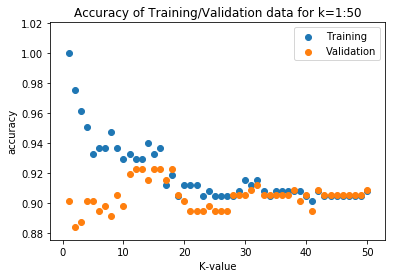

In [5]:
# Part 2 Solution

# --- write code here ---
#compute accuracy for k values 1-50
training_accuracy_list=[]
validation_accuracy_list=[]
accuracies={}
for k in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=k) #compute for k neighbors
    knn.fit(x_train,y_train)
    #compute accuracy: N_correct/N_total
    #training
    training_accuracy_list.append(compute_accuracy(x_train,y_train))
    #validation
    validation_accuracy_list.append(compute_accuracy(x_val,y_val))
    accuracies[k]=[]
    accuracies[k].append(compute_accuracy(x_train,y_train))
    accuracies[k].append(compute_accuracy(x_val,y_val))
k_vals=range(1,51) #setup y_axis
plt.scatter(k_vals,training_accuracy_list,label='Training') #training is blue
plt.scatter(k_vals,validation_accuracy_list,label='Validation') #validation is orange
plt.legend()
plt.xlabel("K-value")
plt.ylabel("accuracy")
plt.title("Accuracy of Training/Validation data for k=1:50")
#print(validation_accuracy_list)

### Part 2 Written Response

_Type your written response here_

Classification accuracy for k=1 on the training data has an accuracy value of 1.0, whereas the accuracy of k=1 on validation data is 0.9. This is reasonable because the training data has been trained using exactly the right answer, when k=1 the model has the highest variance possible, meaning that it will fit perfectly for the data it is trained on, thus the algorithm makes the correct prediction for all training data points. For validation data, the accuracy is lower since we have high variance, so different data sets will drastically affect results. 

I think that we should choose a value of K based solely on the accuracy of the validation data because that is the whole reason we are making the model in the first place - to classify unknown data samples. With this in mind, first we select the highest accuracy k-values, and in the case of a tie, the larger k-value is preferable because larger k-values reduce the effect of noise (class outliers) on classification. In other words, higher k-values decrease variance. Therefore, the ideal choice for K is 18 in this instance. 

## Part 3 (15 points)  
Consider two new hypothetical datasets, `x_train_inf` and `x_val_inf` and their corresponding labels `y_train_inf` and `y_val_inf`, each of which contain an infinite number of samples from the same data generating process as parts 1-3. Disregarding computational and storage constraints, would you expect a K-nearest neighbors model trained on the `x_train_inf` and `y_train_inf` to achieve a classification accuracy of 1.0 when evaluated on `x_val_inf` and `y_val_inf`? Justify your answer in 2-3 sentences.

### Part 3 Written Response

_Type your written response here_


If we choose to let k=1 then the KNN model will have the highest possible variance. In this case, the model will fit perfectly on data it is trained with. The usual drawback of high variance is that the model will vary drastically according to the data it is trained with. However, in this special case of infinite training samples, we need not worry about the model's variance, since it is being trained with all possible training data sets (infinitely large x_train_inf). Therefore, when we measure the model's accuracy for predicting validation data, we can be confident that it will be 1.0 because the model is perfectly fit for all possible data points.  

## Part 4 (5 points - Extra Credit)

Your colleague claims that K-nearest neighbors is an inappropriate model for the raw data, and that the classifier could be improved by scaling each column of `x_train` to be between 0 and 1. Using your colleague's suggestion, train a new model and reproduce the plot from part 2. Explain how and why this data transformation changes the accuracy of the model.

Hint: Whatever transformation you apply to `x_train` should also be applied to `x_val` when evaluating the model.

In [7]:
# Part 4 Solution
# --- write code here ---


### Part 4 Written Response

_Type your written response here_

# Problem 2 - Neural Networks

In this problem you'll use a fully-connected neural network to classify a dataset of handwritten digits.

In [6]:
digit_data = load_digits()

In [7]:
n = digit_data['data'].shape[0]

x = digit_data['data']
y = digit_data['target']

x_train = x[:int(n/2)]
y_train = [keras.utils.to_categorical(y[:int(n/2)], num_classes=10)]
x_val = x[int(n/2):]
y_val = [keras.utils.to_categorical(y[int(n/2):], num_classes=10)]

## Part 1 (30 points)  
Write a function `NN_model(n)`, which returns a compiled keras neural network model with n fully connected layers, each with 64 nodes and a rectified linear unit activation function. After each fully connected layer add a dropout layer with a dropout parameter of 0.1. After the n layers, add a final fully connected layer with 10 nodes and a sigmoid activation. Compile your model with a categorical crossentropy loss, the adam optimization method, and classification accuracy as the only metric.

Hint: You may find it helpful to use the Keras sequential model API. https://keras.io/getting-started/sequential-model-guide/

In [11]:
# Part 1 Solution
# --- write code here ---
num_cols=digit_data['data'].shape[1]
def NN_model(n):
    #return compiled KERAS neural net model 
    model = Sequential()
    model.add(Dense(64, input_dim=num_cols, activation='relu'))
    model.add(Dropout(0.1))
    for i in range(1,n-1):
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.1))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model


## Part 2 (20 points)  
Train your neural network model on `x_train` and `y_train` with `n=1` for 50 epochs, a batch size of 100,  and `verbose=True`. Then evaluate your trained model on `x_val` and `y_val`. Is the classification accuracy monotonic increasing with the number of training steps? Explain why this relationship is/isn't monotonic in 2-3 sentences.

In [12]:
# Part 2 Solution
# --- write code here ---
model=NN_model(n=1)
model.fit(x_train, y_train,
          batch_size=100, epochs=50, verbose=True)
score = model.evaluate(x_val, y_val, batch_size=100)
print("score=")
print(score)


Epoch 1/50
898/898 [==============================] - 1s 1ms/step - loss: 3.9934 - acc: 0.1091
Epoch 2/50
898/898 [==============================] - 0s 21us/step - loss: 2.8356 - acc: 0.1069
Epoch 3/50
898/898 [==============================] - 0s 31us/step - loss: 2.2990 - acc: 0.1203
Epoch 4/50
898/898 [==============================] - 0s 30us/step - loss: 2.2262 - acc: 0.1203
Epoch 5/50
898/898 [==============================] - 0s 32us/step - loss: 2.1905 - acc: 0.1180
Epoch 6/50
898/898 [==============================] - 0s 32us/step - loss: 2.1446 - acc: 0.1437
Epoch 7/50
898/898 [==============================] - 0s 26us/step - loss: 2.1112 - acc: 0.1715
Epoch 8/50
898/898 [==============================] - 0s 33us/step - loss: 2.1108 - acc: 0.1548
Epoch 9/50
898/898 [==============================] - 0s 26us/step - loss: 2.0553 - acc: 0.1715
Epoch 10/50
898/898 [==============================] - 0s 27us/step - loss: 2.0069 - acc: 0.1793
Epoch 11/50
898/898 [===================

### Part 2 Written Response

_Type your written response here_

The training accuracy is not monotonic increasing. We can see that the accuracy sometimes decreases between epochs. I think this is because the model is simulatenously adjusting itself to minimize loss (optimal weights for each parameter) as well as maximize accuracy (correct predictions of validation data).  

Epoch 31/50
898/898 [==============================] - 0s 27us/step - loss: 0.1451 - acc: 0.9577

Epoch 32/50
898/898 [==============================] - 0s 34us/step - loss: 0.1889 - acc: 0.9399

## Part 3 (5 points - Extra Credit)  
For every integer value of n between 1 and 10, train a fully connected neural network using `NN_model(n)` on `x_train` and `y_train` and evaluate the trained model on `x_val` and `y_val`. Create a plot identical to the plot in Problem 1 part 2, except with n on the horizontal axis instead of k. Is this enough evidence to select a specific value for n? If not, what additional analysis would you suggest?

899/899 [==============================] - 1s 861us/step


Text(0.5, 1.0, 'Accuracy of NN with n fully connected layers')

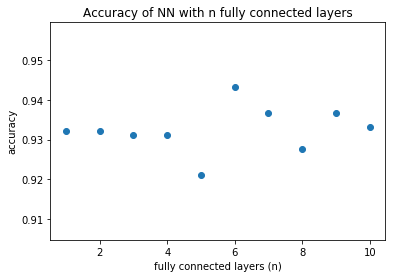

In [13]:
# Part 3 Solution
# --- write code here ---
model_accuracy=[]
def evaluate_models():
    for i in range(1,11):
        modelx=NN_model(i)
        modelx.fit(x_train, y_train,
              batch_size=100, epochs=50,verbose=False)
        score = modelx.evaluate(x_val, y_val, batch_size=100)
        model_accuracy.append(score[1])
evaluate_models()
plt.scatter(range(1,11),model_accuracy,label='validation accuracy')
plt.xlabel("fully connected layers (n)")
plt.ylabel("accuracy")
plt.title("Accuracy of NN with n fully connected layers")

### Part 3 Written Response

_Type your written response here_

I think that additional analysis would be helpful in this case. Although we do evaluate how the number of layers effects model accuracy, it is also important to consider other hyperparameters for the model, such as the number of epochs. An epoch is when the entire dataset is passed forwards and backwards through the neural network one time, then the weights are adjusted in order to increase accuracy. As we go from a small number of epochs to a larger number, the model is at first underfitted, then optimal, and lastly overfitted for the data. 50 may not be the optimal number of epochs, so additional analysis could be analysing accuracy vs. number of epochs so that we can find the 'sweet spot' which is the optimal number of epochs. 